In [4]:
# Set up imports
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
N = 40
x_cities = np.random.random((N,1))
y_cities = np.random.random((N,1))

In [10]:
city_file = open('tsp40.txt')
read = city_file.readlines()
coord= []
x_cities = []
y_cities = []
for line in read:
    read.split()
    coord.append(line)
for i in range(len(coord)):
    N = coord[0]
    if i != 0 :
        x_cities.append(coord[i][0])
        y_cities.append(coord[i][1])
    
print(x_cities, y_cities)

AttributeError: 'list' object has no attribute 'split'

[3, 28, 23, 13, 17, 38, 9, 2, 10, 11, 32, 29, 12, 25, 5, 24, 19, 27, 15, 14, 8, 22, 36, 4, 1, 21, 39, 33, 16, 0, 20, 37, 34, 18, 35, 31, 6, 26, 7, 30]
[19.97775026]


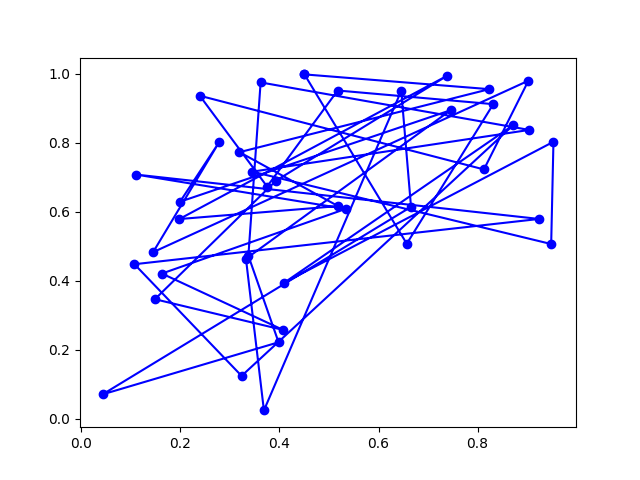

[-6.79927639]


In [16]:
%matplotlib ipympl
def distance(cities, cityorder):
    x = []
    y = []
    totaldistance = 0
    l = len(cities)
    for number in cityorder:
        x.append(cities[number][0])
        y.append(cities[number][1])
    for i in range(l-1):
        totaldistance += np.sqrt((x[i+1] - x[i])**2 + (y[i+1] - y[i])**2)
    totaldistance += np.sqrt((x[0] - x[l-1])**2 + (y[0] - y[l-1])**2)    
    return totaldistance

# x_cities = np.array([0.0, 2.3, 4.2, 2.1])
# y_cities = np.array([1.5, 6.1, 1.3, 4.5])
# N = 10
# # x_cities = np.random.random((N,1))
# # y_cities = np.random.random((N,1))
cities = []
for i in range(len(x_cities)):
    cities.append((x_cities[i],y_cities[i]))
cities = np.asarray(cities)  

T = 100
decayrate = 0.995
order = []
for i in range(len(x_cities)):
    order.append(i)
initial_dist = distance(cities, order)
def tsp(cities):
    global order, T, decayrate
    cityorder = order
    bestcost = distance(cities, order)
    iterations = 0
    while T > 0.01:
    # Randomly select two distinct indices
        # index1, index2 = np.random.choice(len(order), 2, replace=False)
        # order[index1], order[index2] = order[index2], order[index1]
        # new_dist = distance(cities, order)
        order = np.random.permutation(len(cities))
        new_dist = distance(cities, order)


        if new_dist < bestcost:
            cityorder = order
            bestcost = new_dist
        else:
            # probability = 0.9
            probability = np.random.random_sample()
            acceptance = np.exp(-(new_dist - bestcost)/T)
            if probability < acceptance :
                cityorder = order
                bestcost = new_dist
        T *= decayrate
        
    return cityorder

def min_dist(cities):
    finalorder = tsp(cities)
    orderlist =[]
    distlist = []
    for i in range(100):
        finalorder = tsp(cities)
        dist = distance(cities, finalorder)
        orderlist.append(finalorder)
        distlist.append(dist)
    accepted_dist = np.argmin(distlist)
    return orderlist[index]

finalorder = tsp(cities)
print(finalorder)
final_dist = distance(cities,finalorder)
print(final_dist)
xplot = x_cities[finalorder] 
yplot = y_cities[finalorder]
xplot = np.append(xplot, xplot[0])
yplot = np.append(yplot, yplot[0])
plt.plot(xplot, yplot, 'bo-')
plt.show()

improv = ((initial_dist - final_dist)/initial_dist) * 100
print(improv)